# $pK_a$ and $\sigma$ Values with Phenol Acids
We have seen that acid dissociation equilibrium constants for substituted benzoic acids correlate almost exactly to the Hammett substituent constants. That is because one is used to define the other. 

Now let us see how the effect of a substituent on benzoic acid (the hammett $\sigma$ value) correlates to other acid equilibria. We will begin with phenols. 

To start we will load our tools and data sets. then I will merge and clean the dat as we saw in the previous exercise. Examine the code below and be sure to understand each line.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

col_name = "Pyridine_pKa"

def fill_sigma(df):     # a function to fill in sigma for empty spaces in s+ and S-
    for z in df.index:
        if np.isnan(df["s_plus"][z]):
            df["s_plus"][z] = df["sigma"][z]
        if np.isnan(df["s_minus"][z]):
            df["s_minus"][z] = df["sigma"][z]
    return(df)


df1 = pd.read_csv("../data/LFER_Williams.csv", 
                  delimiter = ",", 
                  index_col="Substituent", 
                  comment = "#", 
                  skipinitialspace = True
                 ) 
df2 = pd.read_csv("../data/ACID_williams_pKa.csv", 
                  delimiter = ",", 
                  index_col="Substituent", 
                  comment = "#", 
                  skipinitialspace = True
                 ) 
df1 = fill_sigma(df1)

df3 = df1.join(df2)
display(df3.head(5))

data = df3[["sigma", "s_plus", "s_minus", col_name]]
data = data.dropna()

display(data.head(3))



,sigma,s_plus,s_minus,Page,BzOH_pKa,PhOH_pKa,Aniline pKa,DMA_pKa,Pyridine_pKa
Substituent,,,,,,,,,
m-Br,0.39,0.39,0.39,259.0,3.81,9.11,3.51,3.08,2.84
p-Br,0.23,0.15,0.25,259.0,4.00,9.34,3.91,3.52,NaN
m-C6H5,0.06,0.06,0.06,278.0,NaN,9.59,4.18,NaN,NaN
p-C6H5,-0.01,0.02,-0.18,278.0,NaN,9.51,4.27,NaN,NaN
m-CCCH3,0.10,0.10,0.10,265.0,NaN,NaN,NaN,NaN,NaN


,sigma,s_plus,s_minus,Pyridine_pKa
Substituent,,,,
m-Br,0.39,0.39,0.39,2.84
m-CH3,-0.06,-0.06,-0.06,5.68
p-CH3,-0.14,-0.31,-0.17,6.02


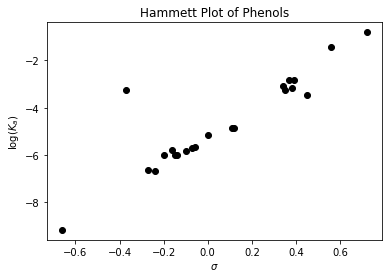

In [46]:
x = data["sigma"]
y = -data[col_name]

plt.plot(x, y, "ko")

plt.title("Hammett Plot of Phenols")               
plt.xlabel(r"$\sigma$")               
plt.ylabel(r"$\log(K_a)$")         

plt.show()

,sigma,s_plus,s_minus,Pyridine_pKa
Substituent,,,,
H,0.00,0.00,0.00,5.14
m-Br,0.39,0.39,0.39,2.84
m-CH3,-0.06,-0.06,-0.06,5.68
m-CMe3,-0.10,-0.10,-0.10,5.82
m-CN,0.56,0.56,0.56,1.45
m-COCH3,0.38,0.38,0.38,3.18
m-Cl,0.37,0.37,0.37,2.84
m-Et,-0.07,-0.07,-0.07,5.70
m-F,0.34,0.34,0.34,3.10


The slope is 6.34 +/- 0.62
The intercept is -5.24 +/- 0.20


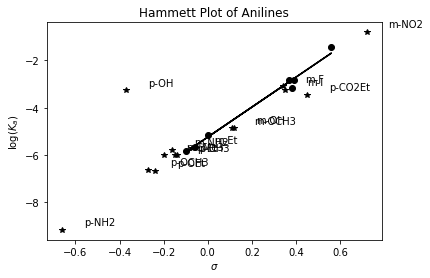

In [49]:
sort = data.sort_index()
display(sort)
meta = sort[0:7]
para = sort [7:]

x = meta["sigma"]
y = -meta[col_name]
plt.plot(x, y, "ko")

line = stats.linregress(x,y)
print("The slope is {:.2f} +/- {:.2f}".format(line.slope, 2*line.stderr))
print("The intercept is {:.2f} +/- {:.2f}".format(line.intercept, 2*line.intercept_stderr))
y_list = line.slope*x+line.intercept
plt.plot(x, y_list, "k-")

x = para["sigma"]
y = -para[col_name]
plt.plot(x, y, "k*")

plt.title("Hammett Plot of Anilines")               
plt.xlabel(r"$\sigma$")               
plt.ylabel(r"$\log(K_a)$")         
for i in range(len(x)):
    plt.text(x[i]+.1, y[i]+.2, x.index[i])

plt.show()

# Analyze the Data
That didn't look so good. If we look through the data we see that the m-substituted phenols seem to fall in a line while the p-substituted phenols scatted above that line. We can visualize this by separating  the two sets. How could we do that? There are many ways,

I will try sorting the data by the index entries. All the "m"s will end up together.

The slope is 5.09 +/- 1.15
The intercept is -4.98 +/- 0.39


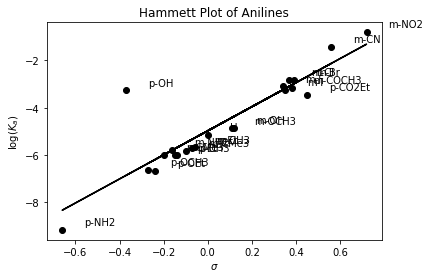

,sigma,s_plus,s_minus,Pyridine_pKa
Substituent,,,,
m-Br,0.39,0.39,0.39,2.84
m-CH3,-0.06,-0.06,-0.06,5.68
p-CH3,-0.14,-0.31,-0.17,6.02
m-Cl,0.37,0.37,0.37,2.84
m-CMe3,-0.10,-0.10,-0.10,5.82
p-CMe3,-0.20,-0.26,-0.13,5.99
m-CN,0.56,0.56,0.56,1.45
p-CO2Et,0.45,0.45,0.64,3.45
m-COCH3,0.38,0.38,0.38,3.18


In [50]:
x = data["sigma"]
y = -data[col_name]

plt.plot(x, y, "ko")

line = stats.linregress(x,y)
print("The slope is {:.2f} +/- {:.2f}".format(line.slope, 2*line.stderr))
print("The intercept is {:.2f} +/- {:.2f}".format(line.intercept, 2*line.intercept_stderr))

y_list = line.slope*x+line.intercept
plt.plot(x, y_list, "k-")

plt.title("Hammett Plot of Anilines")               
plt.xlabel(r"$\sigma$")               
plt.ylabel(r"$\log(K_a)$")    

for i in range(len(x)):
    plt.text(x[i]+.1, y[i]+.2, x.index[i])
                
plt.show()

data


The slope is 5.78 +/- 0.40
The intercept is -5.18 +/- 0.14


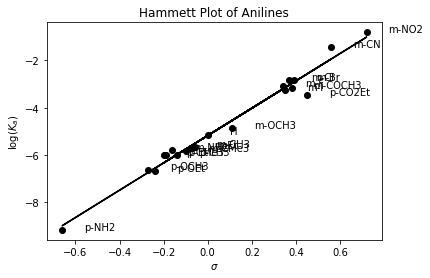

In [52]:
x = data["sigma"]
y = -data[col_name]

x["p-Et"] = -0.19                           # Error corrections
#x["p-CO2CH3"] = +0.64

#to_drop = ["p-NH3+", "m-NH3+", "p-NH2", "m-NH2", "p-C6H5", "m-C6H5" ]
to_drop = ["p-OH", "m-OH"]
x.drop(labels=to_drop, inplace=True)         # poorly justified deletion of data points
y.drop(labels=to_drop, inplace=True)


plt.plot(x, y, "ko")

line = stats.linregress(x,y)
print("The slope is {:.2f} +/- {:.2f}".format(line.slope, 2*line.stderr))
print("The intercept is {:.2f} +/- {:.2f}".format(line.intercept, 2*line.intercept_stderr))

y_list = line.slope*x+line.intercept
plt.plot(x, y_list, "k-")

plt.title("Hammett Plot of Anilines")               
plt.xlabel(r"$\sigma$")               
plt.ylabel(r"$\log(K_a)$")    

for i in range(len(x)):
    plt.text(x[i]+.1, y[i]+.0, x.index[i])
                
plt.show()